In [1]:
from sklearn.metrics import (
    plot_precision_recall_curve, precision_recall_curve, confusion_matrix, classification_report)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#PR regions
data_size = 1837 # total number of data samples
data_pos = 500 # number of data samples that are actually positive

#Triage -  you can adjust these parameters
triage_recall = 0.95 # recall is at least this threshold, "near-perfect" recall
triage_proportion = 0.70 # predict true for fewer than this threshold

triage_precision = lambda total_num_data, num_actual_positive: (num_actual_positive * triage_recall) / (total_num_data * triage_proportion) # the recall should be at least this threshold

#Prioritize -  you can adjust these parameters
prioritize_precision = 0.95 # precision is at least this threshold, "near-perfect" precision
prioritize_proportion = 0.10 # predict true for more than this threshold

prioritize_recall = lambda total_num_data, num_actual_positive: ((total_num_data * prioritize_proportion) * prioritize_precision) / num_actual_positive # the recall should be at least this threshold


print(f'prioritize_recall: {prioritize_recall(data_size, data_pos)}')
print(f'triage_precision: {triage_precision(data_size, data_pos)}')

#A function to visualize the pr_model curve
def show_pr_model(data, data_size_, data_pos_):
    #plt.figure(figsize=(8, 6))  
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # NEW CODE: for drawing the curve
    #plt.plot(data['recall'], data['precision'], label = data['label'], linestyle="solid")
    for i in range(len(data['recall'])):
        plt.plot(data['recall'][i], data['precision'][i], label = data['label'][i], linestyle="solid")


    # triage
    x =  [triage_recall, 1.0]
    y1 = [triage_precision(data_size_, data_pos_), triage_precision(data_size_, data_pos_)]
    y2 = [1.0, 1.0]

    plt.fill_between(x, y1, y2,
                        facecolor='none',
                        color='orange',
                        alpha=0.2)

    plt.text(triage_recall - 0.27, triage_precision(data_size, data_pos) + 0.02, 'Triage Model Region', size=15, color='orange')

    # priortize
    x =  [prioritize_recall(data_size, data_pos), 1.0]
    y1 = [prioritize_precision, prioritize_precision]
    y2 = [1.0, 1.0]

    plt.fill_between(x, y1, y2,
                        facecolor='none',
                        color='blue',
                        alpha=0.2)

    plt.text(prioritize_recall(data_size, data_pos) + 0.01, prioritize_precision - 0.05, 'Prioritize Model Region', size=15, color='blue', alpha=0.5)

    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.xticks(list(plt.xticks()[0]) + [round(triage_recall, 3), round(prioritize_recall(data_size, data_pos), 3)])
    plt.yticks(list(plt.yticks()[0]) + [round(triage_precision(data_size, data_pos), 3), round(prioritize_precision, 3)])
    plt.xticks(rotation=90)
    #plt.title(f'Precision-Recall Curve Regions of an Ideal Model', fontsize=16)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.tight_layout()
    plt.legend(prop={"size":10}, loc=4)
    plt.show()

prioritize_recall: 0.34903
triage_precision: 0.36939108795396225


In [3]:
# Results Analyis
exp26 = pd.read_csv("Experiment_26/output/exp26_results2.csv")
exp27 = pd.read_csv("Experiment_27/output/exp27_results.csv")
exp28 = pd.read_csv("Experiment_28/output/exp28_results.csv")
exp29 = pd.read_csv("Experiment_29/output/exp29_results.csv")

#Precision-recalls
precision_26, recall_26, thresholds_26 = precision_recall_curve(exp26['label'], exp26['score'])
precision_27, recall_27, thresholds_27 = precision_recall_curve(exp27['label'], exp27['score'])
precision_28, recall_28, thresholds_28 = precision_recall_curve(exp28['label'], exp28['score'])
precision_29, recall_29, thresholds_29 = precision_recall_curve(exp29['label'], exp29['score'])

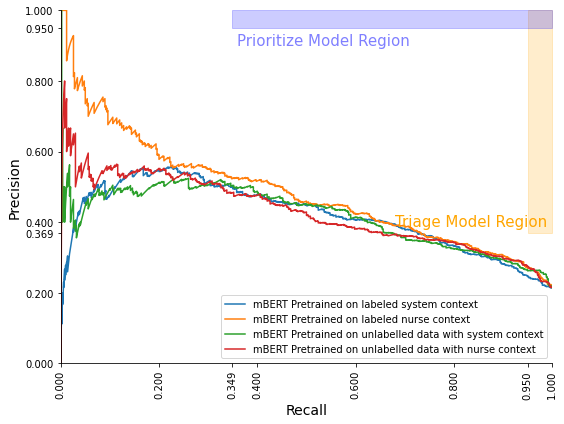

In [4]:
data = {'recall': [recall_26, recall_27, recall_28, recall_29],
        
        'precision': [precision_26, precision_27,  precision_28, precision_29],
        'label': [
                  "mBERT Pretrained on labeled system context",
                  "mBERT Pretrained on labeled nurse context",
                  "mBERT Pretrained on unlabelled data with system context",
                  "mBERT Pretrained on unlabelled data with nurse context"
                 ]
       }

show_pr_model(data, data_size, data_pos)